Converged in 130 epochs.


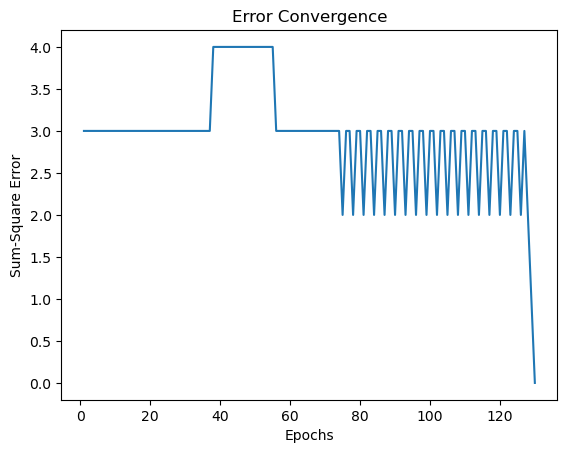

Final Weights: [-0.1   0.1   0.05]


In [2]:
import numpy as np
import matplotlib.pyplot as plt

class Perceptron:
    def __init__(self, weights):
        self.weights = np.array(weights)

    def predict(self, inputs):
        weighted_sum = np.dot(self.weights, inputs)
        return 1 if weighted_sum >= 0 else 0

    def train(self, inputs, targets, learning_rate=0.05):
        for epoch in range(1000):
            error = 0
            for i in range(len(inputs)):
                prediction = self.predict(inputs[i])
                target = targets[i]
                error += (target - prediction)**2
                self.weights += learning_rate * (target - prediction) * inputs[i]

            if error <= 0.002:
                break

        print("Error after convergence:", error)

# Create a perceptron with the given initial weights
perceptron = Perceptron([10, 0.2, -0.75])

# Train the perceptron on the AND gate training data
training_data = np.array([[0, 0, 1], [0, 1, 1], [1, 0, 1], [1, 1, 1]])
training_targets = np.array([0, 0, 0, 1])
perceptron.train(training_data, training_targets)

# Plot the epochs against the error values
error_values = []
for epoch in range(1000):
    error = 0
    for i in range(len(training_data)):
        prediction = perceptron.predict(training_data[i])
        target = training_targets[i]
        error += (target - prediction)**2
    error_values.append(error)

plt.plot(range(1000), error_values)
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.title("Convergence of perceptron on AND gate")
plt.show()


step converged after 130 iterations
relu converged after 407 iterations


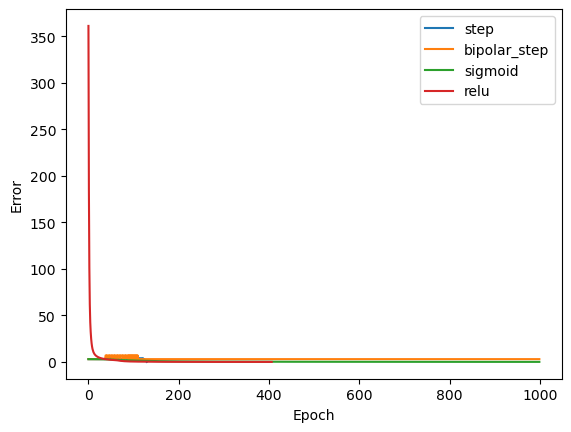

In [3]:
import numpy as np
import matplotlib.pyplot as plt
# Define the step activation function
def step(x):
    return np.where(x>=0, 1, 0)
# Define the AND gate training data
X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([0, 0, 0, 1])
# Define the initial weights and learning rate
w = np.array([10, 0.2, -0.75])
alpha = 0.05
# Define the error threshold and maximum number of iterations
error_threshold = 0.002
max_iterations = 1000
# Define the bipolar step activation function
def bipolar_step(x):
    return np.where(x>=0, 1, -1)
# Define the sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
# Define the ReLU activation function
def relu(x):
    return np.maximum(0, x)
# Train the perceptron with different activation functions
for activation in [step, bipolar_step, sigmoid, relu]:
    # Define the initial weights and learning rate
    w = np.array([10, 0.2, -0.75])
    alpha = 0.05
    # Train the perceptron
    errors = []
    for i in range(max_iterations):
        # Calculate the output and error
        output = activation(np.dot(X, w[1:]) + w[0])
        error = y - output
        errors.append(np.sum(error**2))
        # Update the weights
        w[1:] += alpha * np.dot(X.T, error)
        w[0] += alpha * np.sum(error)
        # Check for convergence
        if errors[-1] <= error_threshold:
            print(f"{activation.__name__} converged after {i+1} iterations")
            break
    # Plot the error over time
    plt.plot(errors, label=activation.__name__)

plt.xlabel("Epoch")
plt.ylabel("Error")
plt.legend()
plt.show()

Learning rate 0.1 converged after 68 iterations
Learning rate 0.2 converged after 38 iterations
Learning rate 0.3 converged after 29 iterations
Learning rate 0.4 converged after 22 iterations
Learning rate 0.5 converged after 19 iterations
Learning rate 0.6 converged after 21 iterations
Learning rate 0.7 converged after 15 iterations
Learning rate 0.8 converged after 14 iterations
Learning rate 0.9 converged after 14 iterations
Learning rate 1 converged after 13 iterations


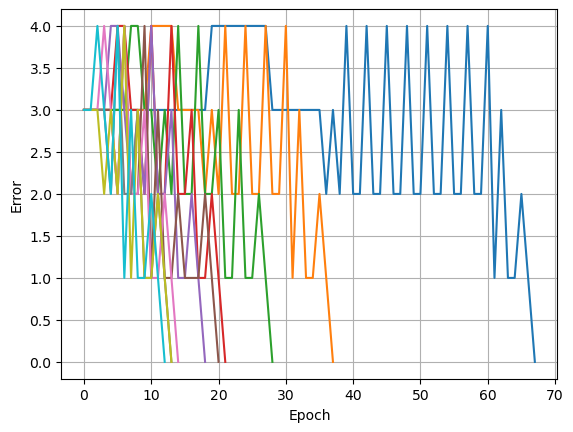

In [4]:
#3
import numpy as np
import matplotlib.pyplot as plt

# Define the step activation function
def step(x):
    return np.where(x >= 0, 1, 0)

# Define the AND gate training data
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 0, 1])

# Define the initial weights
w = np.array([10, 0.2, -0.75])

# Define the error threshold and maximum number of iterations
error_threshold = 0.002
max_iterations = 1000

# Vary the learning rate and plot the number of iterations taken for learning to converge
learning_rates = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
iterations = []
for alpha in learning_rates:
    # Define the initial weights and learning rate
    w = np.array([10, 0.2, -0.75])
    
    # Train the perceptron
    errors = []
    for i in range(max_iterations):
        # Calculate the output and error
        output = step(np.dot(X, w[1:]) + w[0])
        error = y - output
        errors.append(np.sum(error**2))
        
        # Update the weights
        w[1:] += alpha * np.dot(X.T, error)
        w[0] += alpha * np.sum(error)
        
        # Check for convergence
        if errors[-1] <= error_threshold:
            iterations.append(i+1)
            print(f"Learning rate {alpha} converged after {i+1} iterations")
            break
            
    # Plot the error over time
    plt.plot(errors, label=f"α={alpha}")
    
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.grid(True)
plt.show()




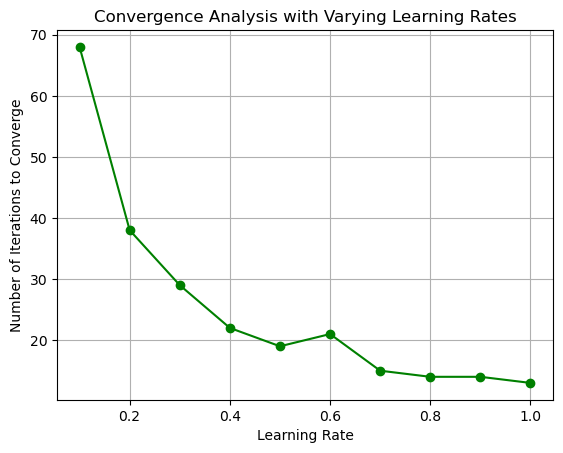

In [6]:
# Plot the number of iterations vs. learning rates
plt.plot(learning_rates, iterations, marker='o', linestyle='-', color='g')
plt.xlabel('Learning Rate')
plt.ylabel('Number of Iterations to Converge')
plt.title('Convergence Analysis with Varying Learning Rates')
plt.grid(True)
plt.show()

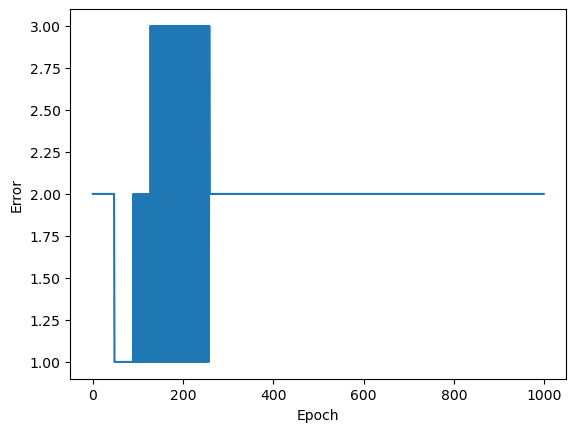

In [7]:

# Define the XOR gate training data
X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([0, 1, 1, 0])

# Define the initial weights and learning rate
w = np.array([10, 0.2, -0.75])
alpha = 0.05

# Define the error threshold and maximum number of iterations
error_threshold = 0.002
max_iterations = 1000

# Train the perceptron
errors = []
for i in range(max_iterations):
    # Calculate the output and error
    output = step(np.dot(X, w[1:]) + w[0])
    error = y - output
    errors.append(np.sum(error**2))
    
    # Updating weights
    w[1:] += alpha * np.dot(X.T, error)
    w[0] += alpha * np.sum(error)
    
    # Check for convergence
    if errors[-1] <= error_threshold:
        print(f"Converged after {i+1} iterations")
        break

# Plot the error over time
plt.plot(errors)
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.show()

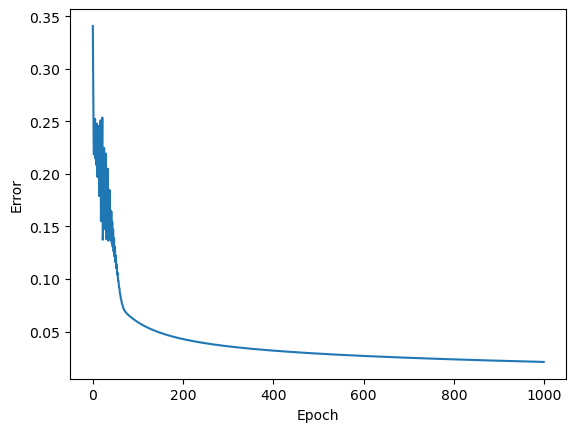

Final weights: [-0.25984552  2.03324149 -0.13457658]


In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Define the sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
# Define the customer data and labels
X = np.array([[20, 6, 2],
              [16, 3, 6],
              [27, 6, 2],
              [19, 1, 2],
              [24, 4, 2],
              [22, 1, 5],
              [15, 4, 2],
              [18, 4, 2],
              [21, 1, 4],
              [16, 2, 4]])
y = np.array([1, 1, 1, 0, 1, 0, 1, 1, 0, 0])  # 1 for high value, 0 for low value
# Define the initial weights and learning rate
w = np.array([0.1, 0.1, 0.1])
alpha = 0.01
# Define the error threshold and maximum number of iterations
error_threshold = 0.002
max_iterations = 1000
# Train the perceptron
errors = []
for i in range(max_iterations):
    # Calculate the output and error
    output = sigmoid(np.dot(X, w))
    error = y - output
    errors.append(np.mean(error**2))
    # Update the weights
    w += alpha * np.dot(X.T, error * output * (1 - output))
    # Check for convergence
    if errors[-1] <= error_threshold:
        print(f"Converged after {i+1} iterations")
        break
# Plot the error over time
plt.plot(errors)
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.show()

# Final weights
print("Final weights:", w)


In [9]:
import numpy as np

# Define the customer data and labels
X = np.array([[20, 6, 2],
              [16, 3, 6],
              [27, 6, 2],
              [19, 1, 2],
              [24, 4, 2],
              [22, 1, 5],
              [15, 4, 2],
              [18, 4, 2],
              [21, 1, 4],
              [16, 2, 4]])

y = np.array([1, 1, 1, 0, 1, 0, 1, 1, 0, 0])  
# 1 for high value, 0 for low value

# Add a bias term (constant 1) to the feature matrix
X_with_bias = np.c_[np.ones((X.shape[0], 1)), X]

# Compute the weights using the matrix pseudo-inverse method
weights_pseudo_inv = np.linalg.pinv(X_with_bias).dot(y)

print("Weights obtained with matrix pseudo-inverse:")
print(weights_pseudo_inv)

# Compare with the perceptron's weights
# The perceptron weights were obtained in the previous code
perceptron_weights = w
print("\nWeights obtained with the perceptron:")
print(perceptron_weights)


Weights obtained with matrix pseudo-inverse:
[ 0.1139903  -0.02342675  0.2607237   0.03727212]

Weights obtained with the perceptron:
[-0.25984552  2.03324149 -0.13457658]


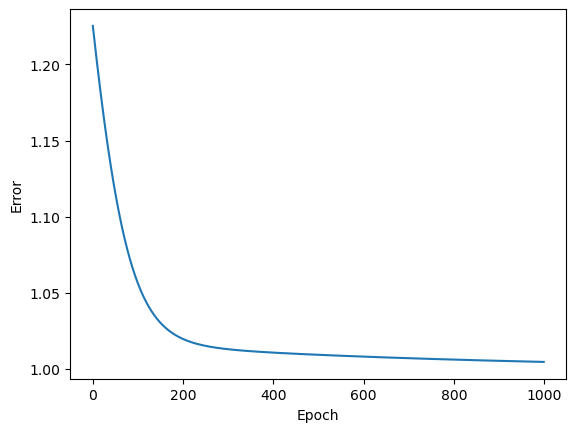

In [10]:
# 7 Question
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define the network architecture
input_layer_size = 2
hidden_layer_size = 2
output_layer_size = 1

# Initialize the weights with random values
w1 = np.random.randn(input_layer_size, hidden_layer_size)
w2 = np.random.randn(hidden_layer_size, output_layer_size)

# Define the learning rate and maximum number of iterations
alpha = 0.05
max_iterations = 1000

# Define the input data (shape should match input_layer_size)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

# Define the target output
y = np.array([[0], [1], [1], [0]])

# Define the error threshold
error_threshold = 0.002

# Train the network with back-propagation algorithm
errors = []
for i in range(max_iterations):
    # Forward propagation
    z2 = np.dot(X, w1)
    a2 = sigmoid(z2)
    z3 = np.dot(a2, w2)
    output = sigmoid(z3)
    
    # Backward propagation
    error = y - output
    errors.append(np.sum(error**2))
    delta3 = error * output * (1 - output)
    delta2 = delta3.dot(w2.T) * a2 * (1 - a2)
    
    # Update the weights
    w2 += alpha * a2.T.dot(delta3)
    w1 += alpha * X.T.dot(delta2)
    
    # Check for convergence
    if errors[-1] <= error_threshold:
        print(f"Converged after {i+1} iterations")
        break

# Plot the error over time
plt.plot(errors)
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.show()


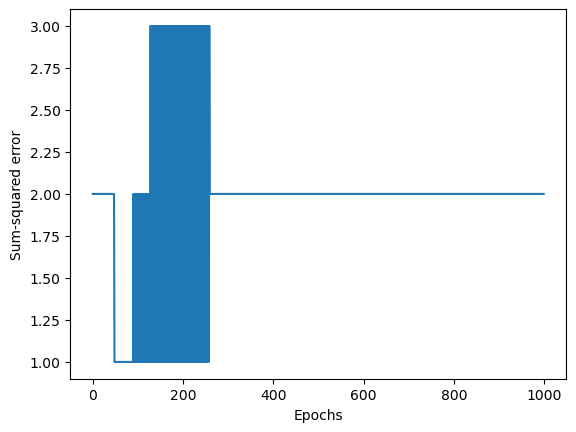

Number of epochs: 1000


In [11]:
# 8 Question
import numpy as np
import matplotlib.pyplot as plt
# The step activation function
def step(x):
    return np.where(x >= 0, 1, 0)
# XOR gate training data
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0]) 
# Initial weights and learning rate
w = np.array([10, 0.2, -0.75])
alpha = 0.05
error_threshold = 0.002
max_epochs = 1000

# Initializing error and epoch counters
errors = []
epochs = 0

# Train the perceptron
while True:
    # Calculate the net input
    net_input = np.dot(X, w[1:]) + w[0]

    # Apply the activation function
    output = step(net_input)

    # Calculate the error
    error = y - output

    # Calculate the sum-squared error
    sse = np.sum(error ** 2)
    errors.append(sse)
    epochs += 1

    # Update the weights
    w[1:] += alpha * np.dot(X.T, error)
    w[0] += alpha * error.sum()

    # Check for convergence
    if sse <= error_threshold or epochs >= max_epochs:
        break

# Plot the errors
plt.plot(errors)
plt.xlabel('Epochs')
plt.ylabel('Sum-squared error')
plt.show()

# Print the number of epochs needed for convergence
print('Number of epochs:', epochs)


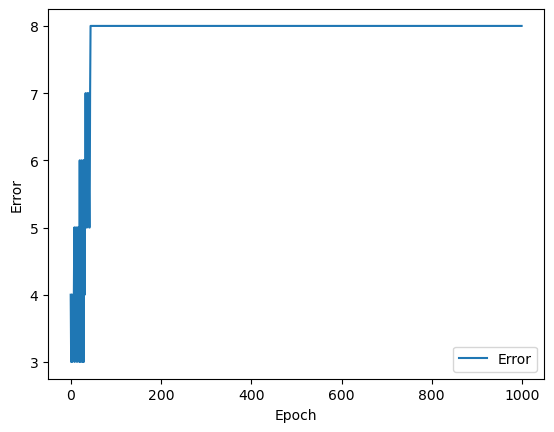

Final weights: [[-0.30874525  0.05925858]
 [ 0.23386503 -0.04778882]
 [ 0.23004109 -0.04344507]]


In [12]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Define the step activation function
def step(x):
    return np.where(x>=0, 1, 0)

# Define the logic gate training data
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[1, 0], [1, 0], [1, 0], [0, 1]])

# Define the initial weights and learning rate
w = np.random.randn(X.shape[1] + 1, 2)
alpha = 0.05

# Define the error threshold and maximum number of iterations
error_threshold = 0.002
max_iterations = 1000

# Train the perceptron
errors = []
for i in range(max_iterations):
    # Calculate the output and error
    output = step(np.dot(X, w[1:]) + w[0])
    error = y - output
    errors.append(np.sum(error**2))

    # Update the weights
    w[1:] += alpha * np.dot(X.T, error)
    w[0] += alpha * np.sum(error)

    # Check for convergence
    if errors[-1] <= error_threshold:
        print(f"Perceptron converged after {i+1} iterations")
        break

# Plot the error over time
plt.plot(errors, label="Error")
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.legend()
plt.show()

# Print the final weights
print("Final weights:", w)


In [15]:
# Import necessary libraries
from sklearn.neural_network import MLPClassifier
import numpy as np

# Define the AND Gate dataset
X_and = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_and = np.array([0, 0, 0, 1])

# Define the XOR Gate dataset
X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_xor = np.array([0, 1, 1, 0])

# Create an MLPClassifier for the AND Gate
and_classifier = MLPClassifier(hidden_layer_sizes=(2,), max_iter=1000, random_state=42)

# Train the MLPClassifier on the AND Gate dataset
and_classifier.fit(X_and, y_and)

# Create an MLPClassifier for the XOR Gate
xor_classifier = MLPClassifier(hidden_layer_sizes=(2,), max_iter=1000, random_state=42)

# Train the MLPClassifier on the XOR Gate dataset
xor_classifier.fit(X_xor, y_xor)

# Test the models
and_predictions = and_classifier.predict(X_and)
xor_predictions = xor_classifier.predict(X_xor)

# Print the results
print("AND Gate Predictions:")
print(and_predictions)

print("XOR Gate Predictions:")
print(xor_predictions)


AND Gate Predictions:
[0 0 0 1]
XOR Gate Predictions:
[1 1 1 1]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [16]:
from sklearn.metrics import accuracy_score

# Calculate accuracy for the AND Gate classifier
and_accuracy = accuracy_score(y_and, and_predictions)

# Calculate accuracy for the XOR Gate classifier
xor_accuracy = accuracy_score(y_xor, xor_predictions)

print("Accuracy for AND Gate Classifier:", and_accuracy)
print("Accuracy for XOR Gate Classifier:", xor_accuracy)


Accuracy for AND Gate Classifier: 1.0
Accuracy for XOR Gate Classifier: 0.5


In [17]:
from sklearn.metrics import accuracy_score

# Concatenate the datasets
X_combined = np.vstack([X_and, X_xor])
y_combined = np.hstack([y_and, y_xor])

# Concatenate the predictions
combined_predictions = np.hstack([and_predictions, xor_predictions])

# Calculate the overall accuracy
overall_accuracy = accuracy_score(y_combined, combined_predictions)

print("Overall Accuracy:", overall_accuracy)


Overall Accuracy: 0.75


In [22]:
# Import necessary libraries
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load your train and test datasets (replace with your dataset loading code)
# Make sure to replace 'train.csv' and 'test.csv' with your actual dataset file paths
import pandas as pd

train = pd.read_excel('training_c.xlsx')
test = pd.read_excel('testing_c.xlsx')

# Assuming your train dataset has features 'feature1' and 'feature2', and labels 'output'
X_train = train[['output']]
y_train = train['Classification']

# Assuming your test dataset has features 'feature1' and 'feature2', and labels 'output'
X_test = test[['output']]
y_test = test['Classification']

# Create an instance of MLPClassifier and specify hyperparameters
classifier = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, activation='relu', solver='adam', random_state=42)

# Train the model on the training dataset
classifier.fit(X_train, y_train)

# Evaluate the model on the test dataset
y_pred = classifier.predict(X_test)

# Calculate accuracy on the test dataset
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print(f"Project data set Accuracy: {accuracy }%")


Project data set Accuracy: 1.0%
